# View Graph Visualization for Image Matching

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
    
# Now import our modules
from scripts.utils.visualize_graph import visualize_graph, visualize_dataset_graph
from scripts.utils import dataset
from scripts.features import extraction, clustering, matching

/home/farrosalferro/miniconda3/envs/it1/lib/python3.10/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
/home/farrosalferro/miniconda3/envs/it1/lib/python3.10/site-packages/lightglue/lightglue.py:24: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
/home/farrosalferro/miniconda3/envs/it1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Configuration

Set parameters for the visualization.

In [2]:
# Data directory and output configuration
DATA_DIR = "../data/image-matching-challenge-2025"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
OUTPUT_DIR = "None"

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Parameters
FEATURE_EXTRACTOR_TYPE = 'SIFT'
MATCHER_TYPE = 'FLANN'
MIN_INLIER_MATCHES = 10  # Minimum matches to form an edge
CLUSTERING_ALGORITHM = 'ConnectedComponents'
MIN_CLUSTER_SIZE = 3  # Minimum number of images to form a cluster

print(f"Will use {FEATURE_EXTRACTOR_TYPE} features with {MATCHER_TYPE} matcher.")
print(f"Data directory: {DATA_DIR}")

Will use SIFT features with FLANN matcher.
Data directory: ../data/image-matching-challenge-2025


## Load Datasets

List available datasets that we can visualize.

In [3]:
# Load dataset samples
samples = dataset.load_dataset(DATA_DIR)

# Print available datasets and their size
print("Available datasets:")
for dataset_name, items in samples.items():
    print(f"- {dataset_name}: {len(items)} images")

Available datasets:
- imc2023_haiper: 54 images
- imc2023_heritage: 209 images
- imc2023_theather_imc2024_church: 76 images
- imc2024_dioscuri_baalshamin: 138 images
- imc2024_lizard_pond: 214 images
- pt_brandenburg_british_buckingham: 225 images
- pt_piazzasanmarco_grandplace: 168 images
- pt_sacrecoeur_trevi_tajmahal: 225 images
- pt_stpeters_stpauls: 200 images
- amy_gardens: 200 images
- fbk_vineyard: 163 images
- ETs: 22 images
- stairs: 51 images


## Visualize a Small Dataset

Let's start by visualizing a small dataset to understand how the view graph looks.

Processing dataset 'ETs' with 22 images...
Extracting features for 22 images in dataset ETs...


Features ETs: 100%|██████████| 22/22 [00:00<00:00, 38.07it/s]


Building view graph for 22 images...


Matching pairs: 100%|██████████| 231/231 [00:04<00:00, 52.72it/s]



View graph built with 22 nodes and 58 edges.
Clustering graph using ConnectedComponents...
Found 1 clusters and 3 potential outliers.


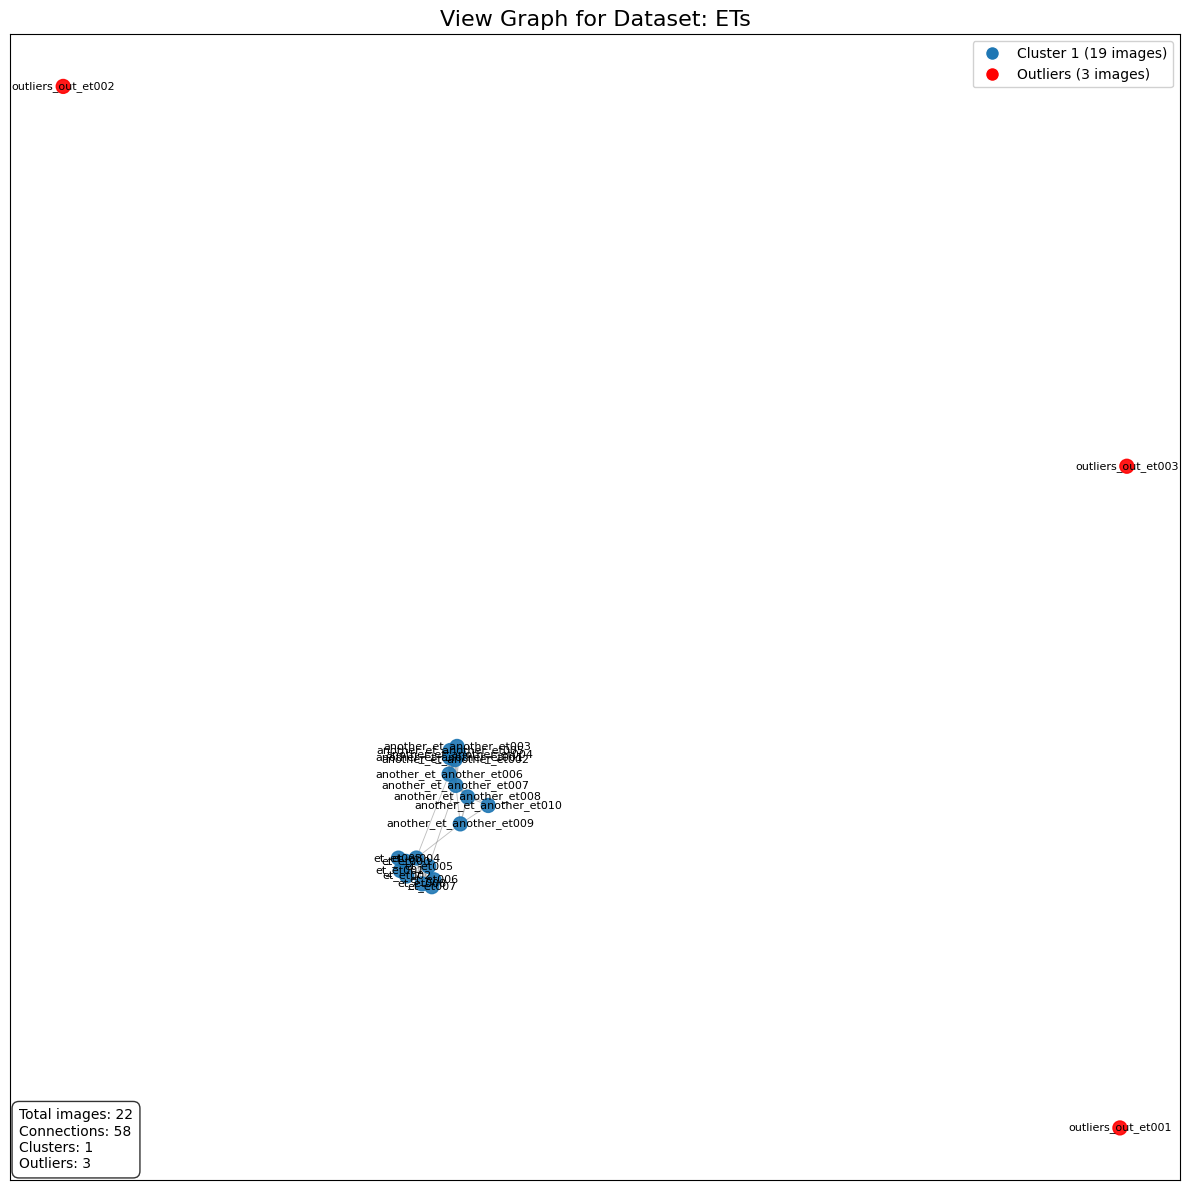


Found 1 clusters with 3 outliers in dataset ETs.
Cluster 1: 19 images


In [4]:
# Choose a small dataset (e.g., 'ETs' which has 22 images)
small_dataset = 'ETs'

# Check if it exists
if small_dataset in samples:
    # Visualize the dataset graph
    G, clusters, outliers = visualize_dataset_graph(
        dataset_id=small_dataset,
        data_dir=DATA_DIR,
        feature_extractor_type=FEATURE_EXTRACTOR_TYPE,
        matcher_type=MATCHER_TYPE,
        min_inlier_matches=MIN_INLIER_MATCHES,
        clustering_algorithm=CLUSTERING_ALGORITHM,
        min_cluster_size=MIN_CLUSTER_SIZE,
        output_dir=OUTPUT_DIR,
        show_fig=True
    )
    
    # Print info about clusters
    print(f"\nFound {len(clusters)} clusters with {len(outliers)} outliers in dataset {small_dataset}.")
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {len(cluster)} images")
else:
    print(f"Dataset {small_dataset} not found. Please choose from the available datasets listed above.")

## Experiment with Parameters

Let's experiment with different parameters to see how they affect the graph and clustering.

Extracting features for 51 images in dataset stairs...


Features stairs: 100%|██████████| 51/51 [00:06<00:00,  7.56it/s]



Testing threshold: 5
Building view graph for 51 images...


Matching pairs: 100%|██████████| 1275/1275 [00:13<00:00, 94.54it/s] 

View graph built with 51 nodes and 213 edges.
Clustering graph using ConnectedComponents...
Found 1 clusters and 2 potential outliers.


<Figure size 1000x1000 with 0 Axes>

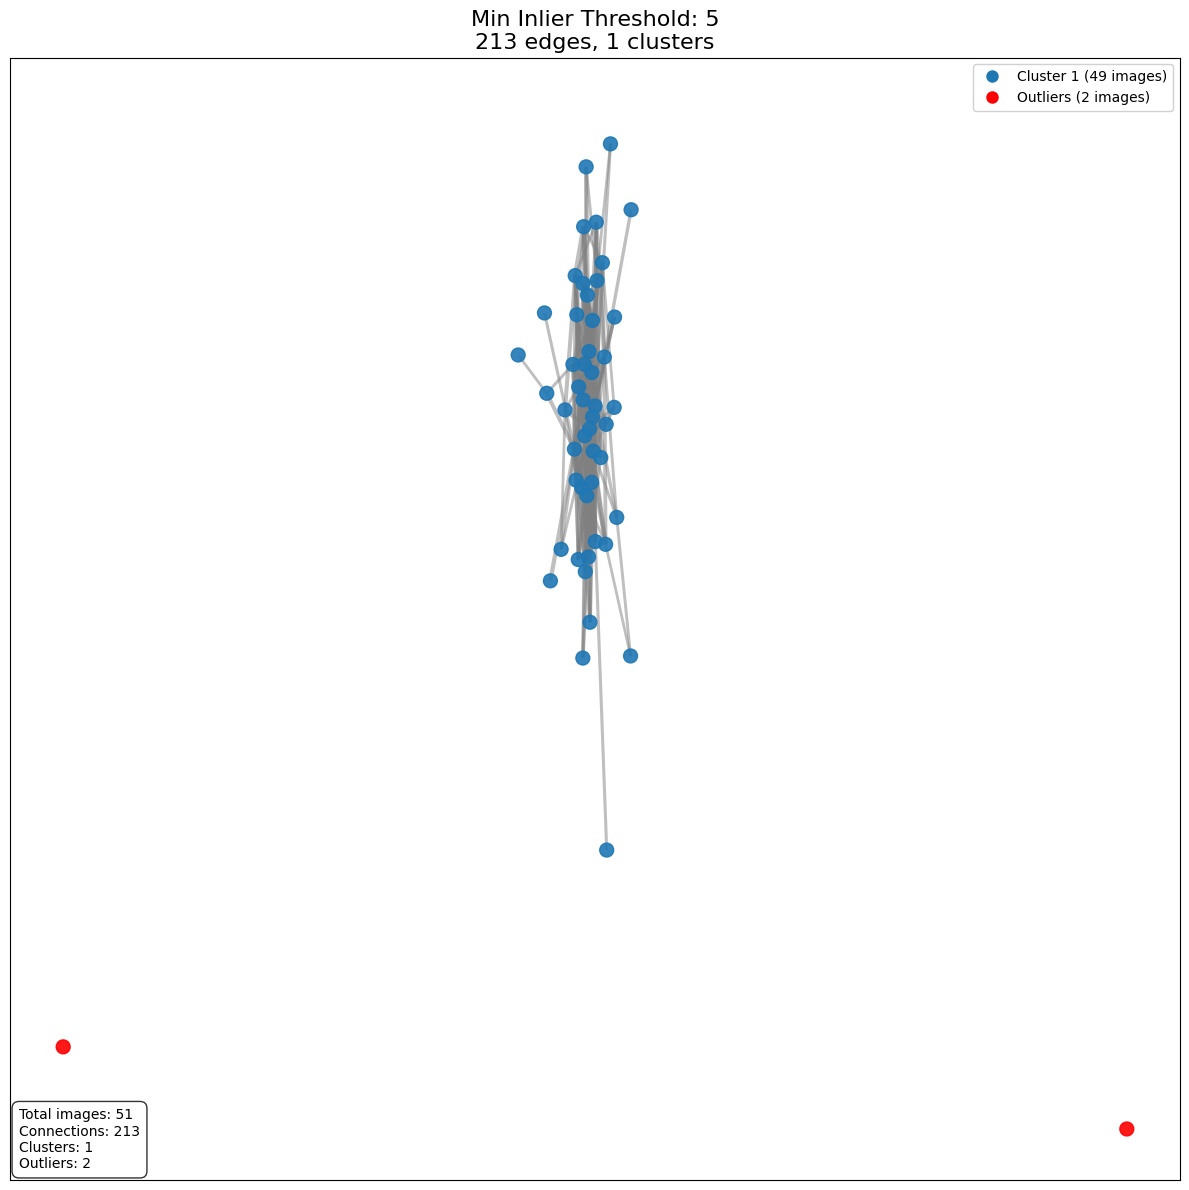

Graph with threshold 5 saved to None/stairs_threshold_5.png
- Edges: 213
- Clusters: 1
- Outliers: 2

Testing threshold: 10
Building view graph for 51 images...


Matching pairs: 100%|██████████| 1275/1275 [00:13<00:00, 92.29it/s] 

View graph built with 51 nodes and 206 edges.
Clustering graph using ConnectedComponents...
Found 1 clusters and 2 potential outliers.


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

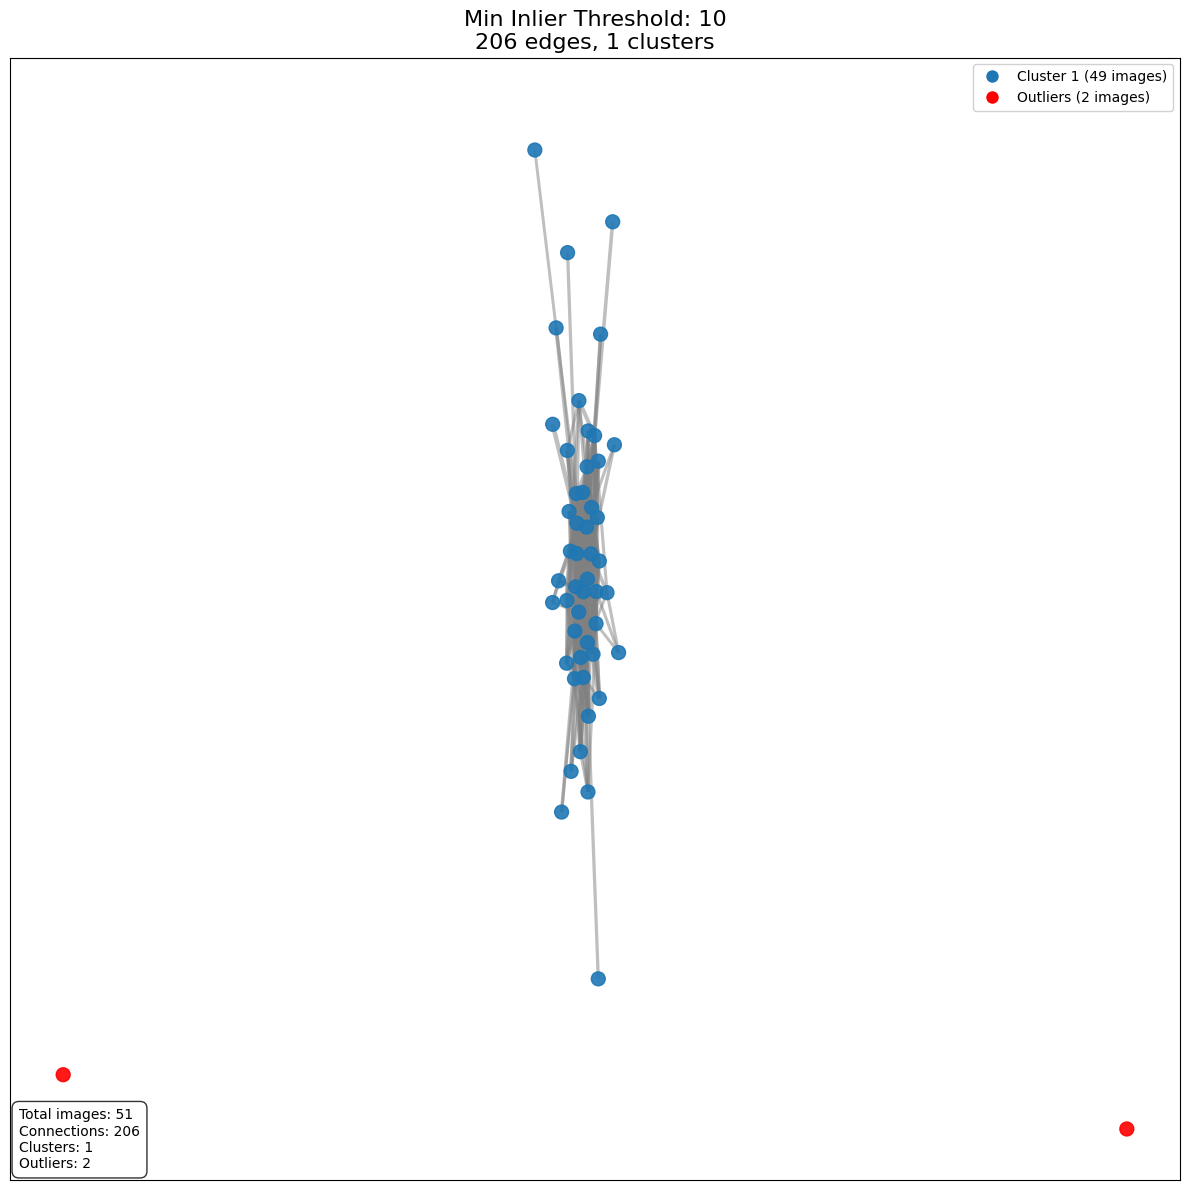

Graph with threshold 10 saved to None/stairs_threshold_10.png
- Edges: 206
- Clusters: 1
- Outliers: 2

Testing threshold: 20
Building view graph for 51 images...


Matching pairs: 100%|██████████| 1275/1275 [00:13<00:00, 92.56it/s] 

View graph built with 51 nodes and 76 edges.
Clustering graph using ConnectedComponents...
Found 1 clusters and 12 potential outliers.


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

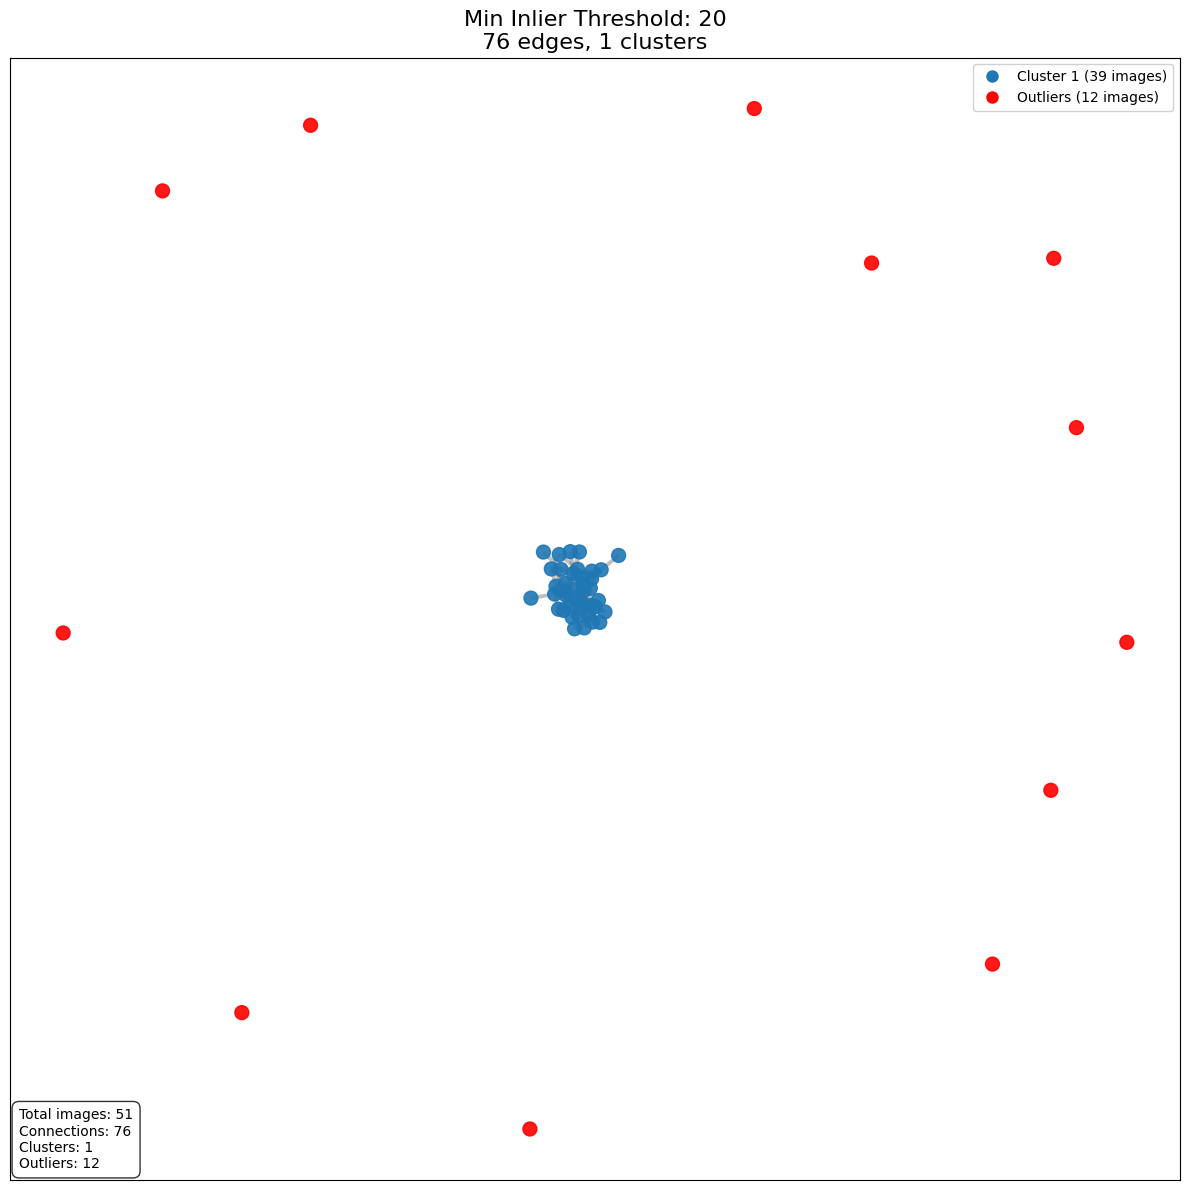

Graph with threshold 20 saved to None/stairs_threshold_20.png
- Edges: 76
- Clusters: 1
- Outliers: 12


<Figure size 640x480 with 0 Axes>

In [5]:
# Try different inlier match thresholds
dataset_id = 'stairs'  # Choose a dataset
match_thresholds = [5, 10, 20]  # Try different thresholds

if dataset_id in samples:
    # Initialize feature extractor and matcher to avoid recreating them
    extractor = extraction.get_feature_extractor(FEATURE_EXTRACTOR_TYPE)
    matcher = matching.get_matcher(MATCHER_TYPE, FEATURE_EXTRACTOR_TYPE)
    
    # Extract features (only need to do this once)
    extracted_features, image_dims = extraction.load_and_extract_features_dataset(
        dataset_id, TRAIN_DIR, extractor
    )
    image_ids = list(extracted_features.keys())
    
    # Try different thresholds
    for i, threshold in enumerate(match_thresholds):
        print(f"\nTesting threshold: {threshold}")
        
        # Build view graph with current threshold
        G, _ = clustering.build_view_graph(
            image_ids, extracted_features, matcher, min_inlier_matches_graph=threshold
        )
        
        # Cluster images
        clusters, outliers = clustering.cluster_images(
            G, algorithm=CLUSTERING_ALGORITHM, min_cluster_size=MIN_CLUSTER_SIZE
        )
        
        # Create a separate figure for each threshold
        plt.figure(figsize=(10, 10))
        title = f"Min Inlier Threshold: {threshold}\n{G.number_of_edges()} edges, {len(clusters)} clusters"
        visualize_graph(G, clusters, outliers, title=title)
        
        # Save the figure
        output_path = os.path.join(OUTPUT_DIR, f"{dataset_id}_threshold_{threshold}.png")
        plt.savefig(output_path, dpi=300)
        print(f"Graph with threshold {threshold} saved to {output_path}")
        
        # Show summary stats
        print(f"- Edges: {G.number_of_edges()}")
        print(f"- Clusters: {len(clusters)}")
        print(f"- Outliers: {len(outliers)}")
else:
    print(f"Dataset {dataset_id} not found. Please choose from the available datasets listed above.")